In [33]:
import pandas as pd
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import DataLoader, random_split
import numpy as np
import matplotlib.pyplot as plt

import seaborn as sns
%matplotlib inline


In [182]:
df = pd.read_csv('./dataset3/cs-training.csv').astype('float32').drop('Unnamed: 0', axis = 1)
df = df.rename(columns={'SeriousDlqin2yrs': "TARGET"})
df_x = df.drop(columns=['TARGET'])

   RevolvingUtilizationOfUnsecuredLines   age  \
0                              0.766127  45.0   

   NumberOfTime30-59DaysPastDueNotWorse  DebtRatio  MonthlyIncome  \
0                                   2.0   0.802982         9120.0   

   NumberOfOpenCreditLinesAndLoans  NumberOfTimes90DaysLate  \
0                             13.0                      0.0   

   NumberRealEstateLoansOrLines  NumberOfTime60-89DaysPastDueNotWorse  \
0                           6.0                                   0.0   

   NumberOfDependents  
0                 2.0  


In [187]:
df_median = df_x.median()
df_avg = df_x.mean()
df_min = df_x.min()
df_max = df_x.max()
df_NA = df_x.isna().sum() / len(df_x)

df_stat = pd.concat([df_median, df_avg, df_min, df_max, df_NA], axis=1)
df_stat = df_stat.rename(columns={df_stat.columns[0]:'Median'})
df_stat = df_stat.rename(columns={df_stat.columns[1]:'Average'})
df_stat = df_stat.rename(columns={df_stat.columns[2]:'Min'})
df_stat = df_stat.rename(columns={df_stat.columns[3]:'Max'})
df_stat = df_stat.rename(columns={df_stat.columns[4]:'NA'})
print(df_stat)

                                           Median      Average  Min  \
RevolvingUtilizationOfUnsecuredLines     0.154181     6.048438  0.0   
age                                     52.000000    52.295208  0.0   
NumberOfTime30-59DaysPastDueNotWorse     0.000000     0.421033  0.0   
DebtRatio                                0.366508   353.005096  0.0   
MonthlyIncome                         5400.000000  6670.221680  0.0   
NumberOfOpenCreditLinesAndLoans          8.000000     8.452760  0.0   
NumberOfTimes90DaysLate                  0.000000     0.265973  0.0   
NumberRealEstateLoansOrLines             1.000000     1.018240  0.0   
NumberOfTime60-89DaysPastDueNotWorse     0.000000     0.240387  0.0   
NumberOfDependents                       0.000000     0.757222  0.0   

                                            Max        NA  
RevolvingUtilizationOfUnsecuredLines    50708.0  0.000000  
age                                       109.0  0.000000  
NumberOfTime30-59DaysPastDueNotWorse  

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


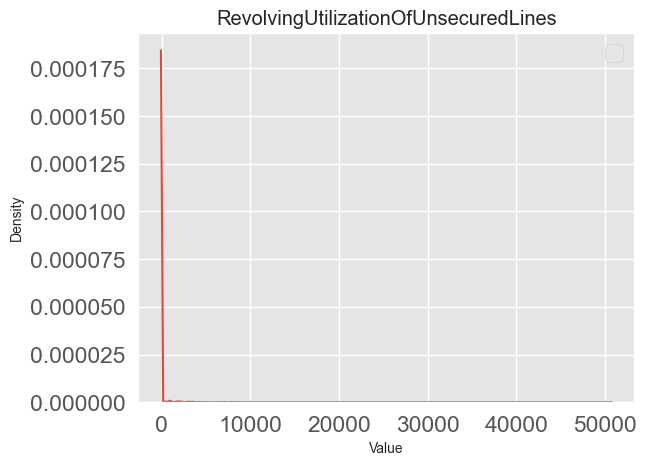

In [201]:
sns.kdeplot(data=df_x['RevolvingUtilizationOfUnsecuredLines'])

plt.title('RevolvingUtilizationOfUnsecuredLines')
plt.xlabel('Value')
plt.ylabel('Density')
#plt.xlim(0, 300)
# Display the plot
plt.legend()
plt.show()

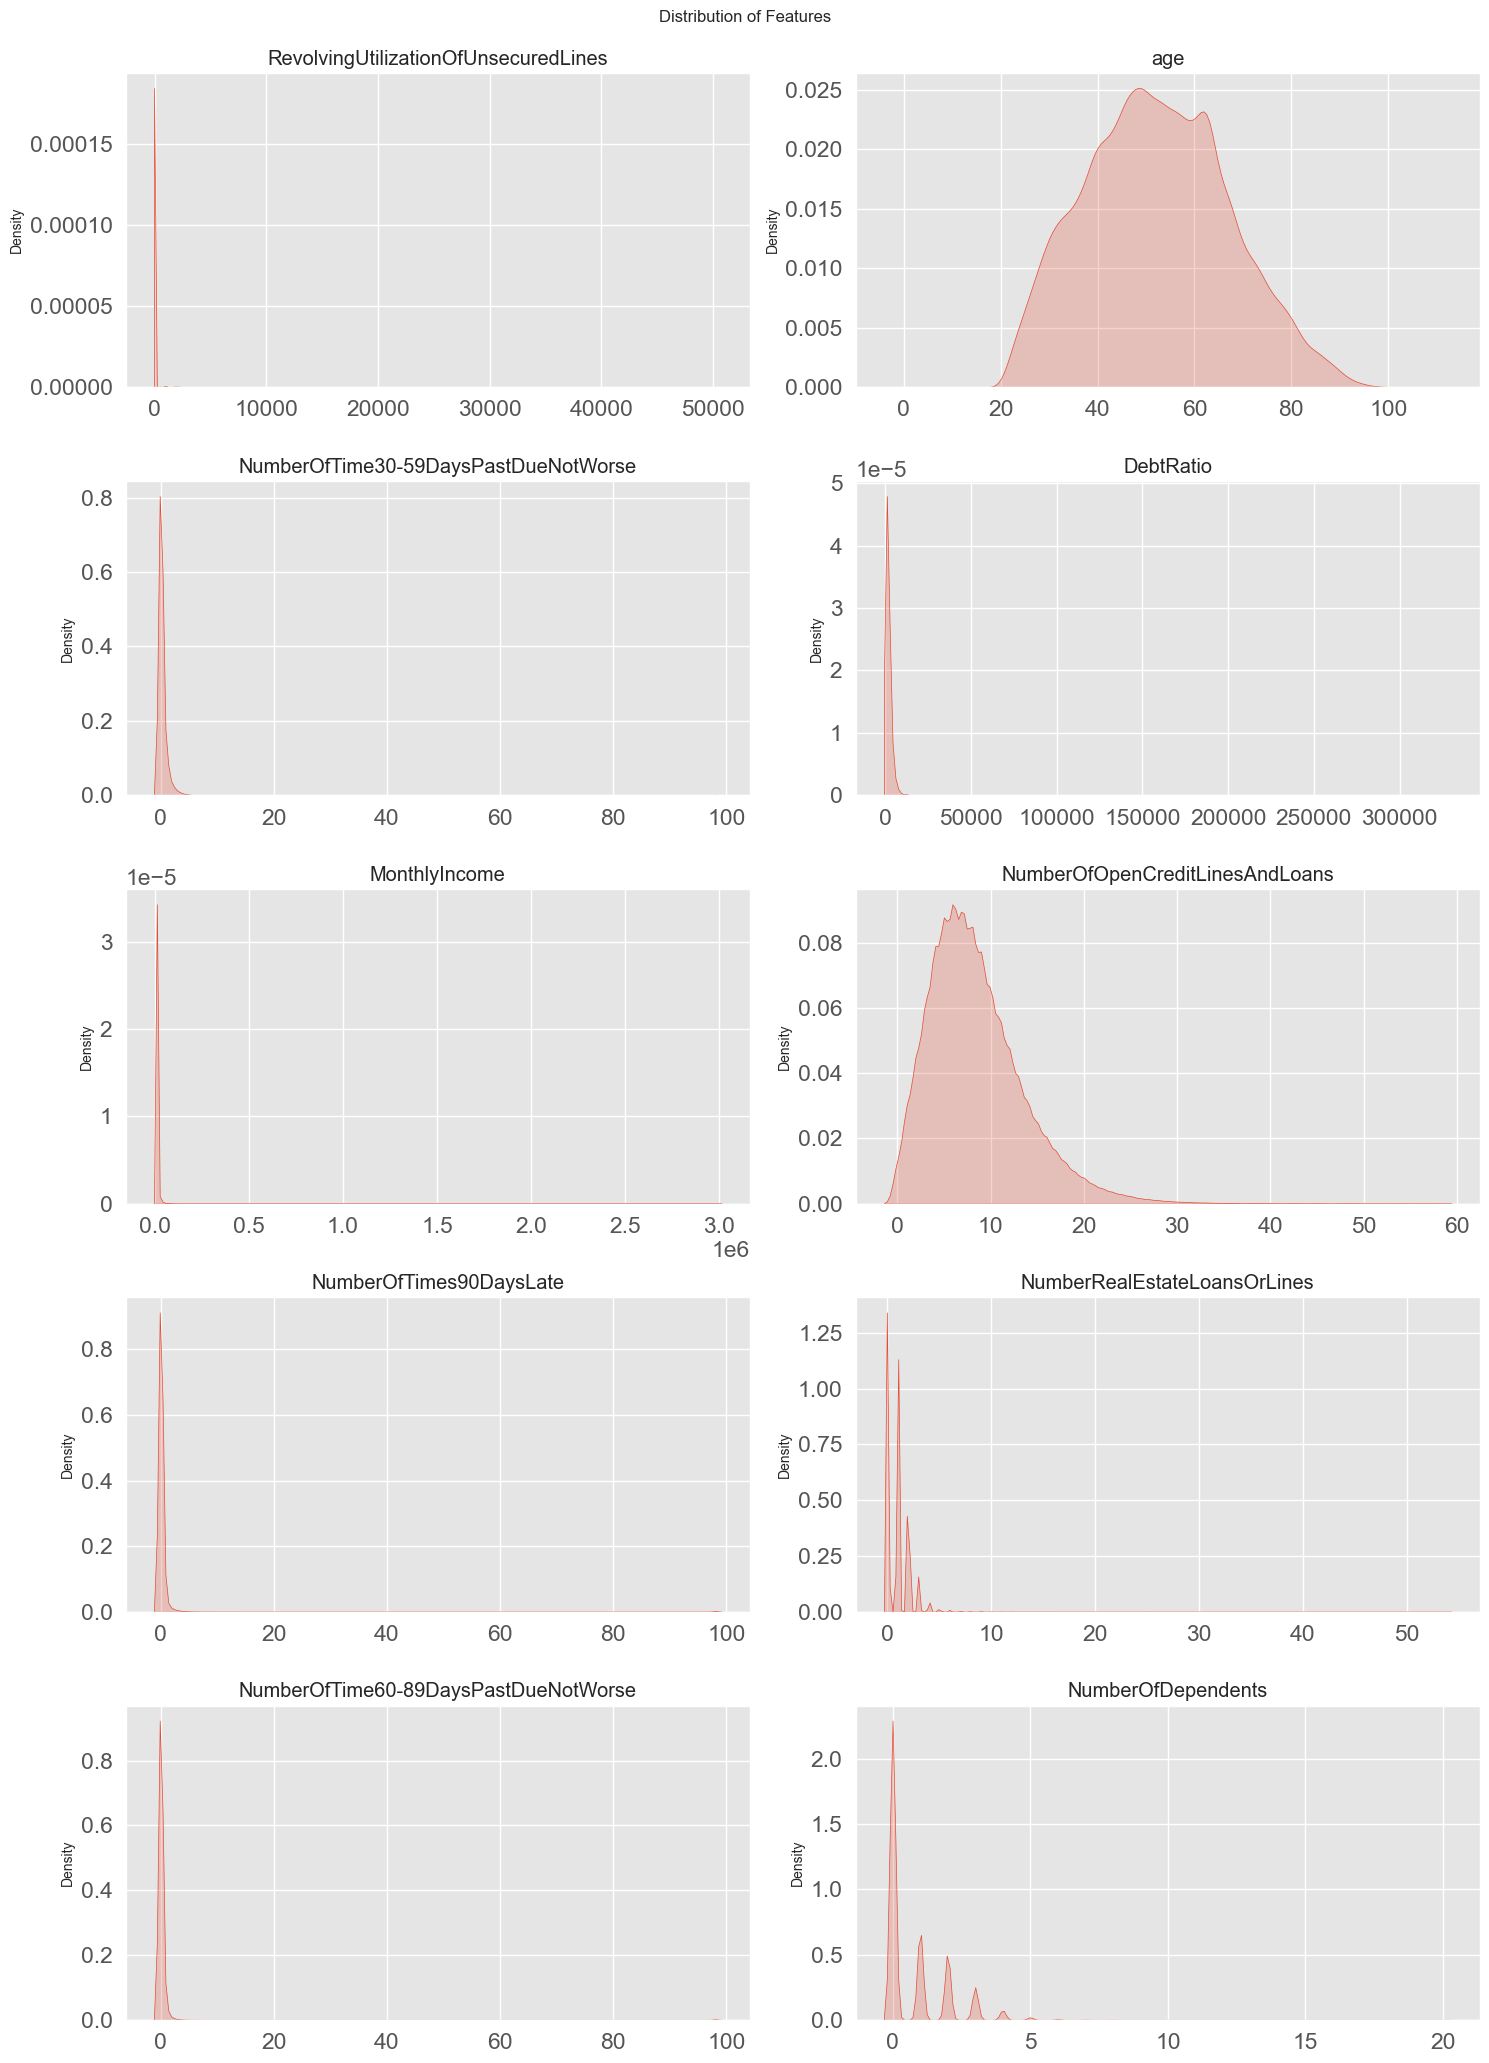

In [198]:
fig, axes = plt.subplots(nrows=5, ncols=2, figsize=(15, 21), sharex=False, sharey=False)
axes = axes.ravel()  # array to 1D
cols = df_x.columns[:]  # create a list of dataframe columns to use

for col, ax in zip(cols, axes):
    # data = df[col]  # select the data
    sns.kdeplot(data=df_x, x=col, fill=True, ax=ax)
    ax.set(title=f'{col}', xlabel=None)

fig.suptitle('Distribution of Features')
fig.tight_layout()
plt.subplots_adjust(top=0.95)
plt.show()

In [202]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
plt.style.use('ggplot')

scaler = StandardScaler()
scaler.fit(df_x)
data_scaled = scaler.transform(df_x)

df_scaled = pd.DataFrame(data=data_scaled)
df_scaled = df_scaled.fillna(df_scaled.mean())
print(df_scaled.head(1))

         0        1         2         3         4         5         6  \
0 -0.02115 -0.49386  0.376593 -0.172833  0.170305  0.883657 -0.063793   

          7         8         9  
0  4.409545 -0.057852  1.114517  


In [203]:
pca = PCA(n_components=10)
pca.fit_transform(df_scaled)
prop_var = pca.explained_variance_ratio_
eigenvalues = pca.explained_variance_

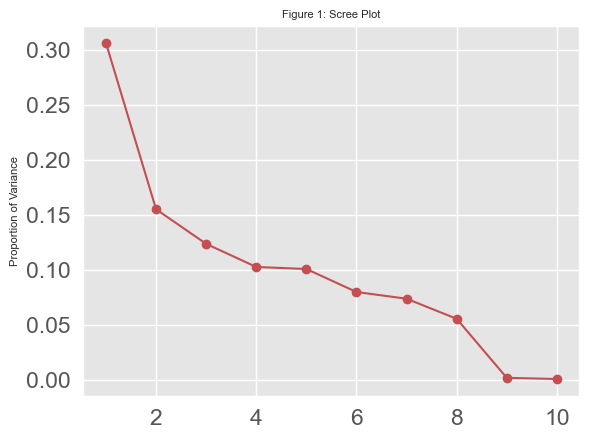

In [204]:
PC_numbers = np.arange(pca.n_components_) + 1

plt.plot(PC_numbers,
         prop_var,
         'ro-')
plt.title('Figure 1: Scree Plot', fontsize=8)
plt.ylabel('Proportion of Variance', fontsize=8)
plt.show()

In [205]:
pca = PCA(n_components=8)
PC = pca.fit_transform(df_scaled)
pca_credit = pd.DataFrame(data = PC,
                           columns = ['PC1', 'PC2','PC3','PC4','PC5','PC6','PC7', 'PC8'])
#pca_credit = pd.DataFrame(data = PC,columns = ['PC1', 'PC2'])
print(pca_credit.head(6))

        PC1       PC2       PC3       PC4       PC5       PC6       PC7  \
0 -0.130518  3.618889 -1.545074 -0.103791 -0.212392 -0.614077  0.632855   
1  0.038350 -1.358803 -0.705761  0.046742  0.239673 -0.072362  0.031768   
2  0.355206 -1.746320 -0.202401  0.130222  0.363767 -0.113383  0.711773   
3  0.067860 -1.481232 -0.552450  0.120126  0.399602 -0.342341  1.078892   
4  0.003784  0.326112  0.049976 -0.128225 -0.599511  3.513802  1.842771   
5 -0.128231 -0.511049  0.788163 -0.110684 -0.289550  0.347431 -1.129601   

        PC8  
0  2.340806  
1 -0.129556  
2  0.113599  
3 -0.380391  
4 -0.218311  
5  1.016981  


In [206]:
finalDf = pd.concat([pca_credit, df[['TARGET']]], axis = 1)
print(finalDf.head(1))

        PC1       PC2       PC3       PC4       PC5       PC6       PC7  \
0 -0.130518  3.618889 -1.545074 -0.103791 -0.212392 -0.614077  0.632855   

        PC8  TARGET  
0  2.340806     1.0  


In [207]:
fig = plt.figure(figsize = (8,8))

# Function to map values to colors
def get_color(value):
    if value == 0:
        return 'red'
    elif value == 1:
        return 'green'

# Add a new 'color' column based on 'value'
finalDf['color'] = finalDf['TARGET'].apply(get_color)

#print(finalDf)
# plt.scatter(finalDf['PC1'], finalDf['PC2'], s=100, c=finalDf['color'])
# plt.xlim(0, 2)
# plt.ylim(0, 6)
# plt.show()


<Figure size 800x800 with 0 Axes>

In [208]:
y = finalDf[['TARGET']]
X = finalDf.drop(columns=['color', 'TARGET'])

In [209]:
X = torch.tensor(X.values).float()
y = torch.tensor(y.values).float()
torch.save(X, './dataset3/X.pt')
torch.save(y, './dataset3/y.pt')

In [7]:
cleanCol = []
for i in range(len(data.columns)):
    cleanCol.append(data.columns[i].replace('-', ''))

data.columns = cleanCol

In [8]:
def removeSpecificAndPutMedian(data, first = 98, second = 96):
    New = []
    med = data.median()
    for val in data:
        if ((val == first) | (val == second)):
            New.append(med)
        else:
            New.append(val)

    return New

In [9]:
def add_freq():
    ncount = len(data)

    ax2=ax.twinx()

    ax2.yaxis.tick_left()
    ax.yaxis.tick_right()

    ax.yaxis.set_label_position('right')
    ax2.yaxis.set_label_position('left')

    ax2.set_ylabel('Frequency [%]')

    for p in ax.patches:
        x=p.get_bbox().get_points()[:,0]
        y=p.get_bbox().get_points()[1,1]
        ax.annotate('{:.1f}%'.format(100.*y/ncount), (x.mean(), y),
                ha='center', va='bottom')

    ax2.set_ylim(0,100)
    ax2.grid(None)

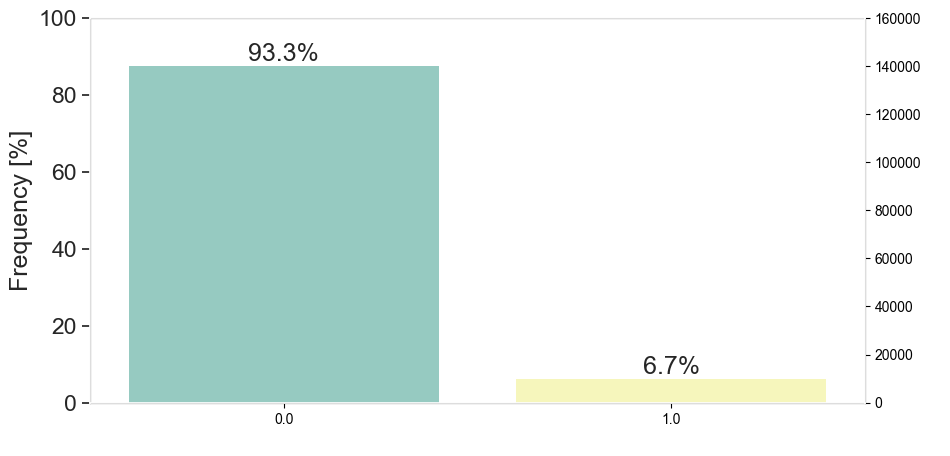

In [12]:
ax = sns.countplot(x = data.SeriousDlqin2yrs ,palette="Set3")
sns.set(font_scale=1.5)
ax.set_ylim(top = 150000)
ax.set_xlabel(' ')
ax.set_ylabel(' ')
fig = plt.gcf()
fig.set_size_inches(10,5)
ax.set_ylim(top=160000)

add_freq()

plt.show()

Outlier detection

In [24]:
def mad_based_outlier(points, thresh=3.5):
    if len(points.shape) == 1:
        points = points[:,None]
    median = np.median(points, axis=0)
    diff = np.sum((points - median)**2, axis=-1)
    diff = np.sqrt(diff)
    med_abs_deviation = np.median(diff)

    modified_z_score = 0.6745 * diff / med_abs_deviation

    return modified_z_score > thresh

def percentile_based_outlier(data, threshold=95):
    diff = (100 - threshold) / 2.0
    (minval, maxval) = np.percentile(data, [diff, 100 - diff])
    return ((data < minval) | (data > maxval))
def std_div(data, threshold=3):
    std = data.std()
    mean = data.mean()
    isOutlier = []
    for val in data:
        if val/std > threshold:
            isOutlier.append(True)
        else:
            isOutlier.append(False)
    return isOutlier

def outlierVote(data):
    x = percentile_based_outlier(data)
    y = mad_based_outlier(data)
    z = std_div(data)
    temp = zip(data.index, x, y, z)
    final = []
    for i in range(len(temp)):
        if temp[i].count(False) >= 2:
            final.append(False)
        else:
            final.append(True)
    return final

def plotOutlier(x):
    fig, axes = plt.subplots(nrows=4)
    functions = [percentile_based_outlier, mad_based_outlier, std_div, outlierVote]
    titles = ['Percentile Based Outlier', 'MAD Based Outlier', 'Std Div Outlier', 'Outlier Vote']

    for ax, func, title in zip(axes, functions, titles):
        sns.kdeplot(data=x, ax=ax)
        outliers = x[func(x)]
        ax.plot(outliers, np.zeros_like(outliers), 'ro', clip_on=False)
        ax.set_title(title)

    plt.tight_layout()
    plt.show()

def plotOutlierFree(x):
    fig, axes = plt.subplots(nrows=4)
    nOutliers = []
    for ax, func in zip(axes, [percentile_based_outlier, mad_based_outlier, std_div, outlierVote]):
        tfOutlier = zip(x, func(x))
        nOutliers.append(len([index for (index, bol) in tfOutlier if bol == True]))
        outlierFree = [index for (index, bol) in tfOutlier if bol == True]
        sns.distplot(outlierFree, ax=ax, rug=True, hist=False)

    kwargs = dict(y=0.95, x=0.05, ha='left', va='top', size=15)
    axes[0].set_title('Percentile-based Outliers, removed: {r}'.format(r=nOutliers[0]), **kwargs)
    axes[1].set_title('MAD-based Outliers, removed: {r}'.format(r=nOutliers[1]), **kwargs)
    axes[2].set_title('STD-based Outliers, removed: {r}'.format(r=nOutliers[2]), **kwargs)
    axes[3].set_title('Majority vote based Outliers, removed: {r}'.format(r=nOutliers[3]), **kwargs)
    fig.suptitle('Outlier Removed By Method with n={}'.format(len(x)), size=20)
    fig = plt.gcf()
    fig.set_size_inches(15,10)

def outlierRatio(data):
    functions = [percentile_based_outlier, mad_based_outlier, std_div, outlierVote]
    outlierDict = {}
    for func in functions:
        funcResult = func(data)
        count = 0
        for val in funcResult:
            if val == True:
                count += 1
        outlierDict[str(func)[10:].split()[0]] = [count, '{:.2f}%'.format((float(count)/len(data))*100)]

    return outlierDict

def replaceOutlier(data, method = outlierVote, replace='median'):
    '''replace: median (auto)
                'minUpper' which is the upper bound of the outlier detection'''
    vote = outlierVote(data)
    x = pd.DataFrame(zip(data, vote), columns=['debt', 'outlier'])
    if replace == 'median':
        replace = x.debt.median()
    elif replace == 'minUpper':
        replace = min([val for (val, vote) in zip(data, vote) if vote == True])
        if replace < data.mean():
            return 'There are outliers lower than the sample mean'
    debtNew = []
    for i in range(x.shape[0]):
        if x.iloc[i][1] == True:
            debtNew.append(replace)
        else:
            debtNew.append(x.iloc[i][0])

    return debtNew


C:\Users\Shuyao\AppData\Local\Temp\ipykernel_28988\335944287.py:3: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  points = points[:,None]
C:\Users\Shuyao\AppData\Local\Temp\ipykernel_28988\335944287.py:3: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  points = points[:,None]


TypeError: object of type 'zip' has no len()

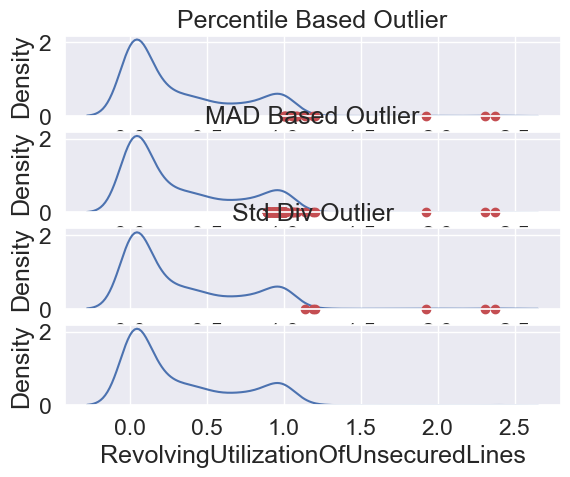

In [25]:
plotOutlier(data.RevolvingUtilizationOfUnsecuredLines.sample(1000))

<Axes: >

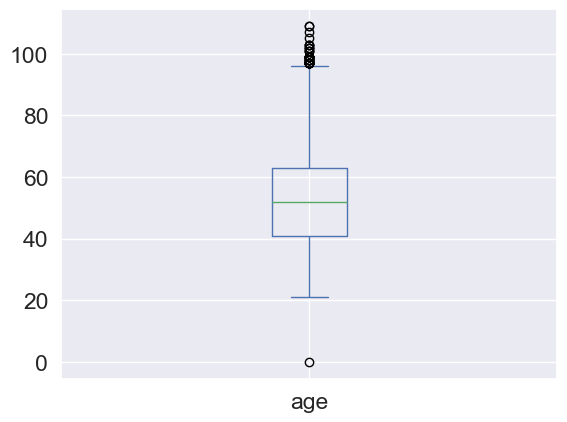

In [26]:
data.age.plot.box()

In [30]:
for i in range(10,30):
    print (i, len(data[data.age < i]))

10 1
11 1
12 1
13 1
14 1
15 1
16 1
17 1
18 1
19 1
20 1
21 1
22 184
23 618
24 1259
25 2075
26 3028
27 4221
28 5559
29 7119
